# Breast Cancer Prediction

# Project Presentation

This project aims to build a machine learning model that can **predict whether a breast tumor is benign or malignant**, using the Breast Cancer Wisconsin dataset. The objective is to support early breast cancer detection by making accurate predictions based on various medical measurements extracted from cell nuclei. By training the model on historical data, the goal is to create a tool that can assist healthcare professionals in making faster and more reliable diagnostic decisions.

# I. Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

In [3]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.set_index('id',inplace=True)

In [5]:
pd.set_option('display.max_columns', None)
df.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [7]:
df.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

After checking for missing values, we found that all relevant features contain no missing data. However, the column **Unnamed: 32** is entirely empty and will be removed from the dataset.

In [8]:
df.drop(columns=["Unnamed: 32"],inplace=True)

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In breast cancer diagnosis:

**Malignant (M)** tumors are cancerous and can spread to other parts of the body (metastasis).

**Benign (B)** tumors are non-cancerous and do not spread, but may still require monitoring or treatment.

In [11]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})


In [12]:
df.sample(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
855133,1,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,1.2140,2.188,8.077,106.00,0.006883,0.01094,0.018180,0.019170,0.007882,0.001754,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
881861,1,12.83,22.33,85.26,503.2,0.10880,0.17990,0.16950,0.06861,0.2123,0.07254,0.3061,1.069,2.257,25.13,0.006983,0.03858,0.046830,0.014990,0.016800,0.005617,15.20,30.15,105.30,706.0,0.17770,0.53430,0.62820,0.19770,0.3407,0.12430
858970,0,10.17,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,0.5158,1.441,3.312,34.62,0.007514,0.01099,0.007665,0.008193,0.041830,0.005953,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


# II. Exploratory Data Analysis (EDA)


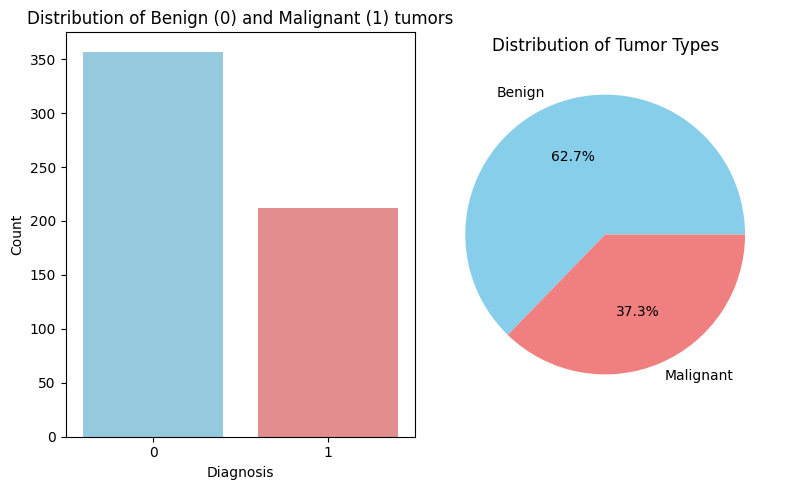

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5)) 

colors = ['skyblue', 'lightcoral']

sns.countplot(x='diagnosis', data=df, palette=colors, ax=axes[0])
axes[0].set_title("Distribution of Benign (0) and Malignant (1) tumors")
axes[0].set_xlabel("Diagnosis")
axes[0].set_ylabel("Count")

df['diagnosis'].value_counts().plot.pie(autopct='%1.1f%%',labels=['Benign', 'Malignant'],
    colors=colors, ax=axes[1])

axes[1].set_title("Distribution of Tumor Types")
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


The dataset includes two diagnosis categories: **benign (B)** and **malignant (M)**. **Benign** cases make up about **62.7%** (357 instances), while **malignant** cases represent around **37.3%** (212 instances). This moderate imbalance means the benign class is more common, which should be considered during modeling to avoid bias toward the majority class.

In [14]:
corr_with_diag = df.corr()['diagnosis']
corr_with_diag.sort_values(ascending=False)


diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

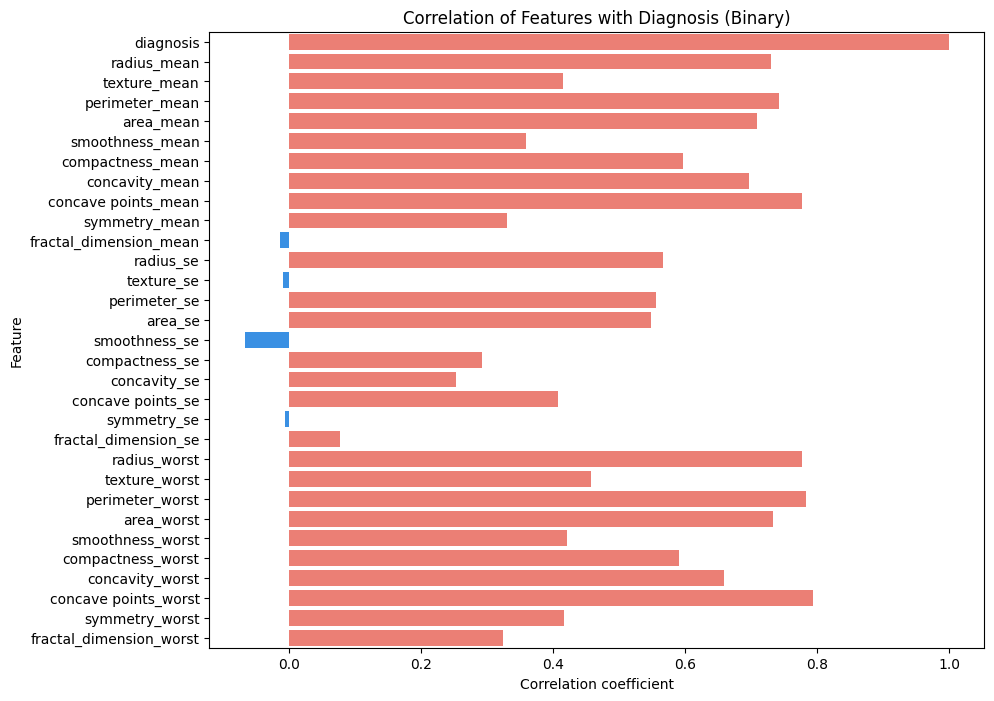

In [15]:
plt.figure(figsize=(10,8))
colors = ['#FF6F61' if val > 0 else 'dodgerblue' for val in corr_with_diag.values]
sns.barplot(x=corr_with_diag.values, y=corr_with_diag.index,palette=colors)
plt.title('Correlation of Features with Diagnosis (Binary)')
plt.xlabel('Correlation coefficient')
plt.ylabel('Feature')
plt.show()

The bar plot shows how each feature correlates with the **diagnosis** (0 = benign, 1 = malignant). 

Features with strong positive correlation — such as `concave points_worst`, `perimeter_worst`, `radius_mean`, and `area_worst` — are highly associated with malignant tumors, making them key indicators for classification..

Only a few features, like `fractal_dimension_mean`, `smoothness_se`, `texture_se`  and `symmetry_se`, show weak negative correlation, suggesting they are slightly more present in benign cases but not very informative overall.

This correlation analysis provides insight into the most relevant features for distinguishing between benign and malignant tumors.

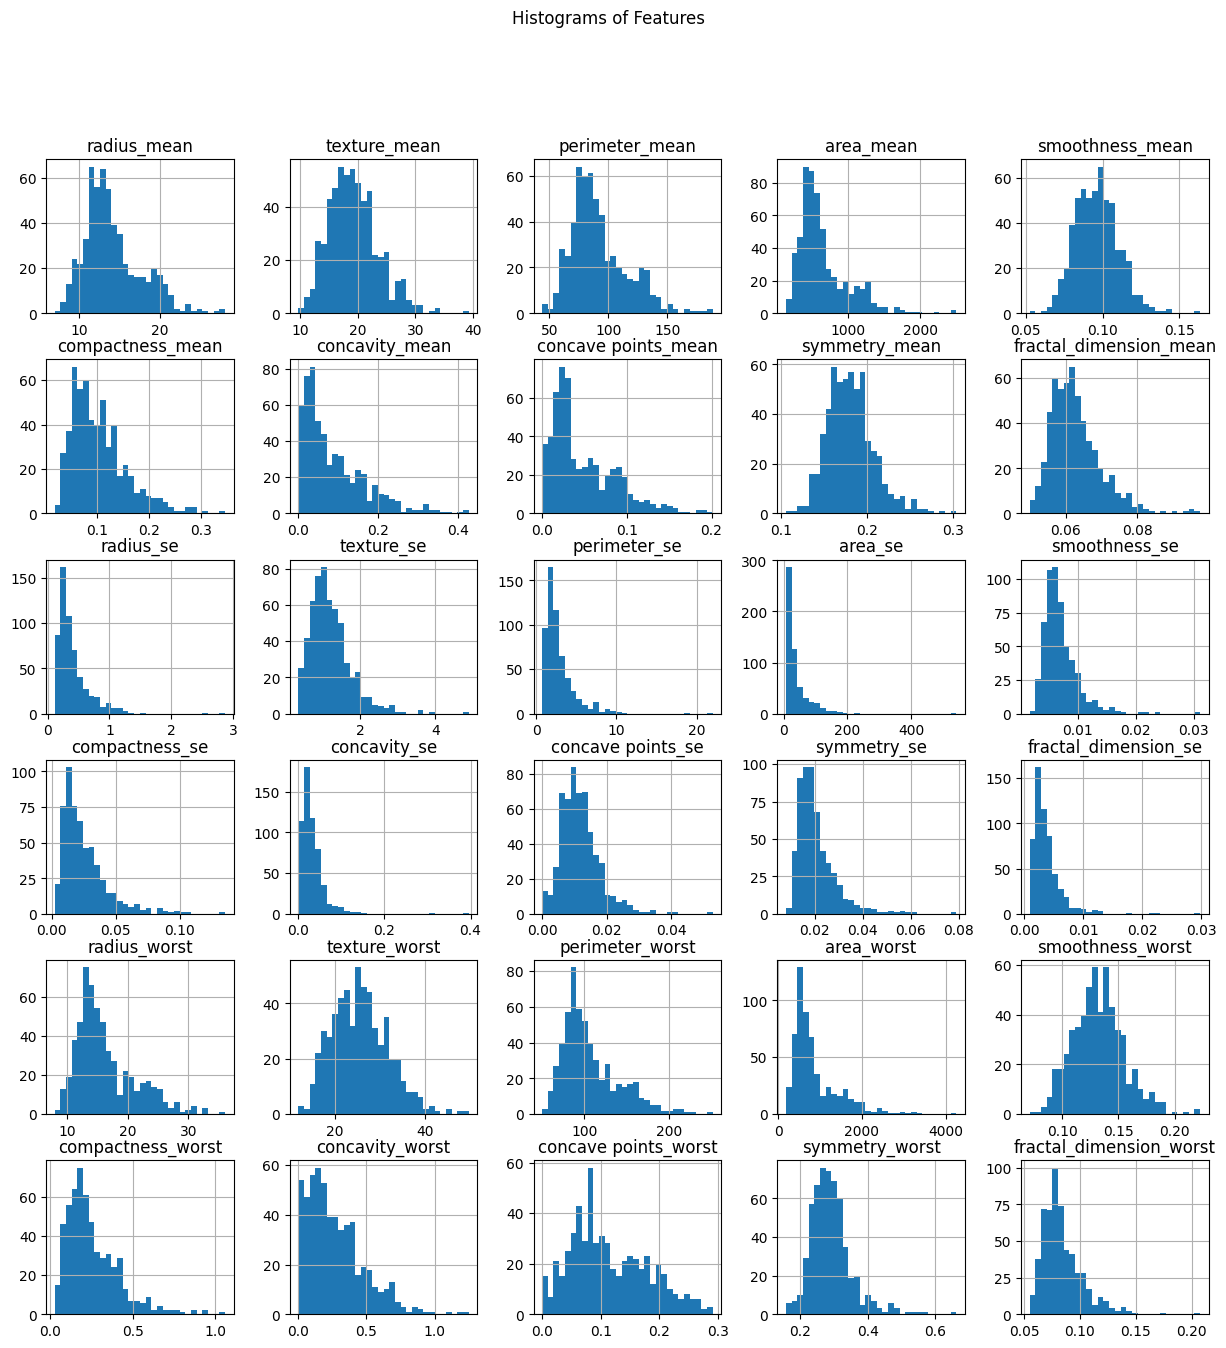

In [16]:
df.drop('diagnosis',axis=1).hist(figsize=(15,15),bins=30)
plt.suptitle("Histograms of Features")
plt.show()

This visualization helps identify important patterns such as skewness, outliers, or uneven distributions. For example, features like area_mean, radius_mean, or concavity_worst may show right-skewed distributions, indicating that most values are concentrated at the lower end with a few extreme values on the higher end. On the other hand, features with more symmetric or bell-shaped histograms suggest a more balanced distribution. Overall, these histograms provide valuable insights into the nature of each feature, which can influence the choice of preprocessing techniques (e.g., normalization or transformation) and may also impact model performance.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

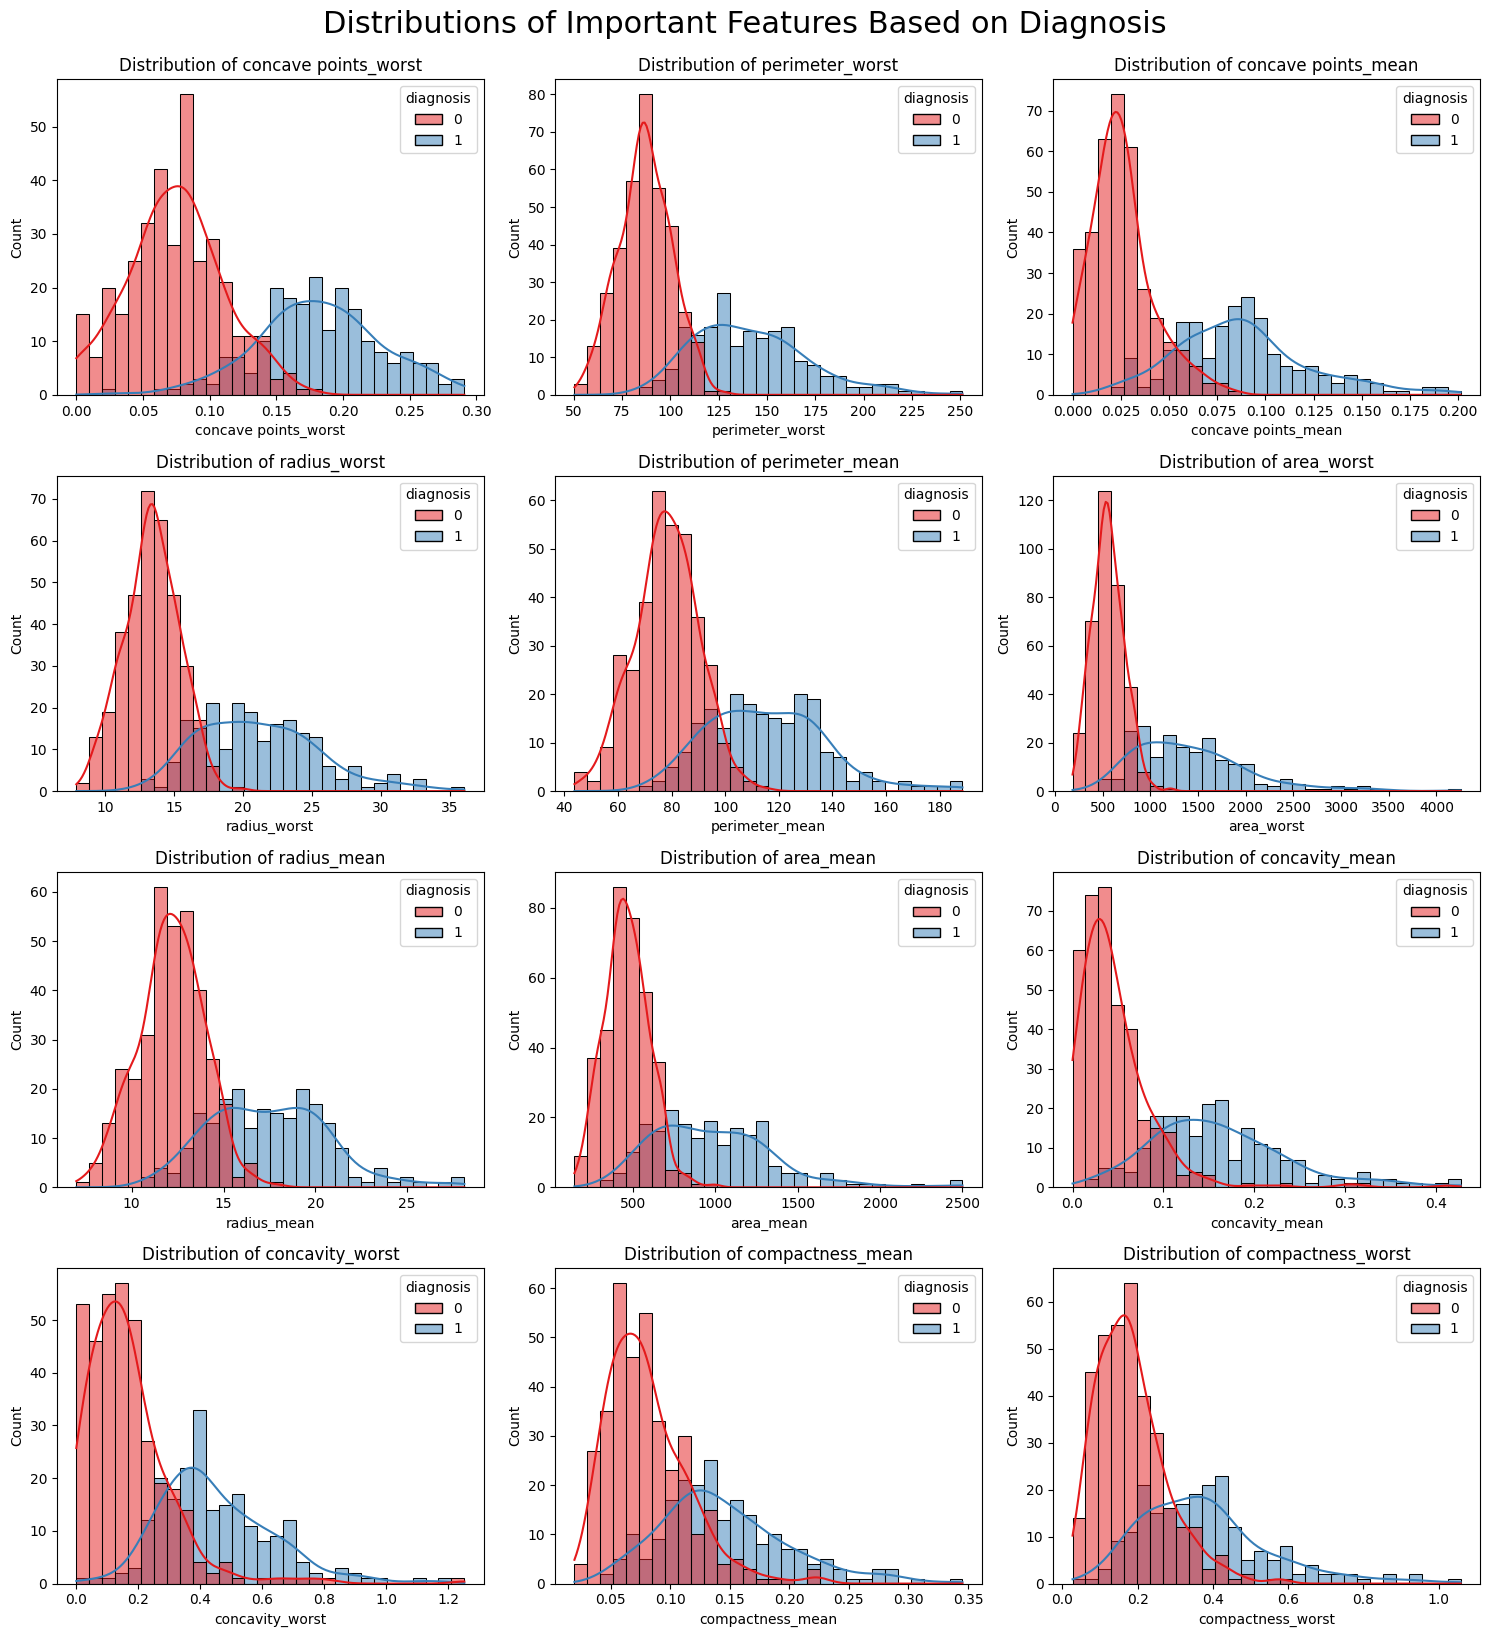

In [17]:
top_features = ["concave points_worst","perimeter_worst","concave points_mean","radius_worst",
                "perimeter_mean","area_worst","radius_mean","area_mean","concavity_mean",
                "concavity_worst","compactness_mean","compactness_worst"]

n_cols = 3
n_rows = -(-len(top_features) // n_cols) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, bins=30, ax=axes[i], palette="Set1")
    axes[i].set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.suptitle("Distributions of Important Features Based on Diagnosis", fontsize=22, y=1.02)
plt.show()


The distribution plots of the top features reveal clear differences between benign and malignant cases. Features such as `concave points_worst`, `perimeter_worst`, and `radius_worst` show distinct separation, indicating that malignant tumors tend to have higher values. Some features exhibit partial overlap, suggesting moderate discriminative power when combined with others. Overall, these results confirm that the selected features effectively capture the morphological differences critical for classifying breast cancer diagnosis.


# III. Classification Models 

To evaluate the predictive performance of different machine learning approaches, several classification models will be implemented and compared. These models will be trained on the preprocessed data and tested on unseen data to assess their ability to correctly classify tumors as benign or malignant. The goal is to identify the most effective model that can make accurate predictions and minimize the risk of misdiagnosis.


### Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='diagnosis')
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=42)


## 1. Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

DT = DecisionTreeClassifier()
params = {
    'max_depth':[5,10,15,20],
    'min_samples_leaf':[5,10,20,30,40],
    'criterion':['gini','entropy']}

cv = KFold(n_splits=10,shuffle=True,random_state=42)
grid_search = GridSearchCV(estimator=DT,param_grid=params,scoring='recall',cv=cv)
best_modelDT = grid_search.fit(X_train,y_train)

In [20]:
print(best_modelDT.best_estimator_)
print(best_modelDT.best_params_)
print(best_modelDT.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}
0.9106145041748755


In [21]:
y_pred = best_modelDT.predict(X_test)

Accuracy : 0.965
Precision : 1.000
Recall : 0.907
F1-score : 0.951

Classification Report :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix :
[[71  0]
 [ 4 39]]


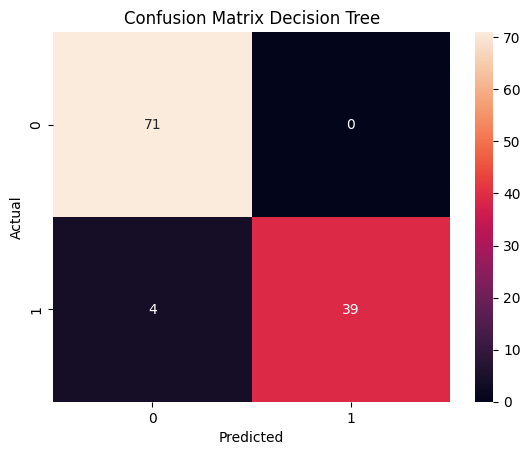

In [22]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall : {recall:.3f}")
print(f"F1-score : {f1:.3f}")

print("\nClassification Report :")
print(classification_report(y_test, y_pred))

print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d',annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Decision Tree")
plt.show()

The **Decision Tree model** shows strong performance with 96.5% accuracy. It perfectly predicts malignant cases without false positives (precision 1.0) and identifies 91% of actual malignant cases (recall 0.907). The confusion matrix confirms few missed malignant cases. Overall, it balances precision and recall well, making it reliable for diagnosis.

## 2. Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred=RF.predict(X_test)

Accuracy : 0.965
Precision : 0.976
Recall : 0.930
F1-score : 0.952

Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
[[70  1]
 [ 3 40]]


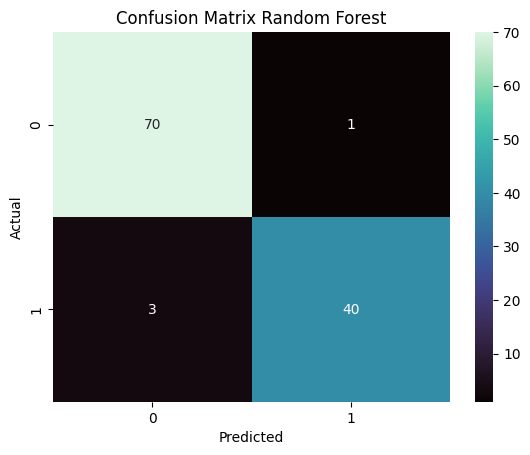

In [24]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall : {recall:.3f}")
print(f"F1-score : {f1:.3f}")

print("\nClassification Report :")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d',cmap='mako', annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Random Forest")
plt.show()

The **Random Forest model** achieves 96.5% accuracy, with high precision (0.976) and recall (0.93) for malignant cases. It correctly identifies 93% of actual malignant cases, missing 3 cases. The confusion matrix shows only 1 benign case misclassified. Overall, the model is accurate and balanced, though the missed malignant cases highlight a trade-off between sensitivity and precision.

## 3. Logistic Regression:



In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

y_pred=reg.predict(X_test)


Accuracy : 0.974
Precision : 0.976
Recall : 0.953
F1-score : 0.965

Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[70  1]
 [ 2 41]]


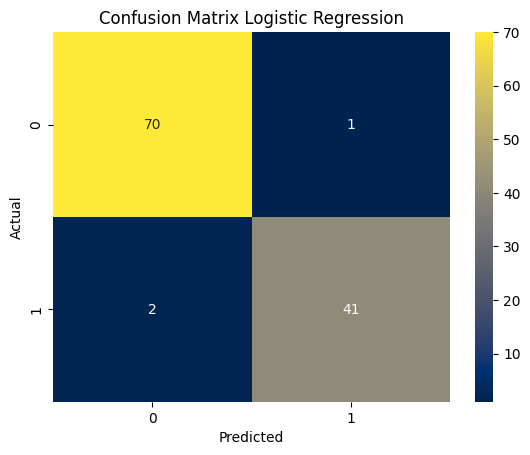

In [28]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall : {recall:.3f}")
print(f"F1-score : {f1:.3f}")

print("\nClassification Report :")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d',cmap='cividis', annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Logistic Regression")
plt.show()

The **Logistic Regression model** achieves 97.4% accuracy with strong precision (0.976) and recall (0.953) for malignant cases. It correctly identifies 95.3% of actual malignant cases, missing only 2 patients classified as benign. The confusion matrix shows 1 benign case misclassified as malignant. Overall, this model balances sensitivity and precision well, making it reliable for detecting sick patients.

## 4. SVM (Support Vector Machine)

In [29]:
from sklearn.svm import SVC
svc = SVC()
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 0.5, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svc, param_grid, cv=cv, scoring='recall')

best_modelSVC=grid_search.fit(X_train, y_train)
y_pred = best_modelSVC.predict(X_test)

print(best_modelSVC.best_estimator_)
print(best_modelSVC.best_params_)
print(best_modelSVC.best_score_)

SVC(C=1)
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.9604995108091083


Accuracy : 0.982
Precision : 1.000
Recall : 0.953
F1-score : 0.976

Classification Report :
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
[[71  0]
 [ 2 41]]


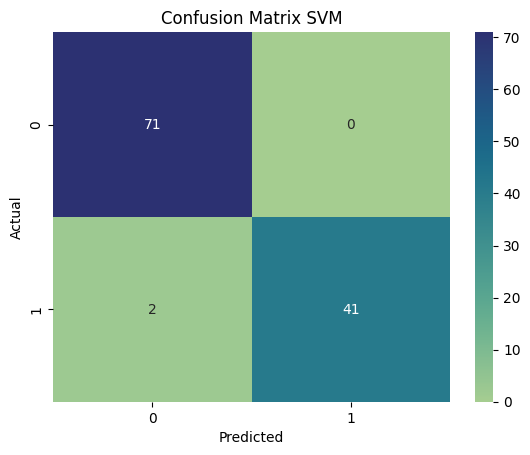

In [30]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall : {recall:.3f}")
print(f"F1-score : {f1:.3f}")

print("\nClassification Report :")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d',cmap='crest', annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix SVM")
plt.show()

The confusion matrix for the **SVM model** indicates excellent performance in classifying breast cancer tumors. Out of 114 test samples, the model correctly identified all 71 benign cases (true negatives) and 41 out of 43 malignant cases (true positives). Importantly, it made no false positive predictions, meaning it did not misclassify any benign tumors as malignant — a critical strength in avoiding unnecessary anxiety and procedures for healthy patients. However, it did produce 2 false negatives, where malignant tumors were mistakenly classified as benign. Overall, the model achieved a precision of 1.00, a recall of 0.953 for malignant cases, and an F1-score of 0.976, demonstrating a strong ability to correctly detect cancer with minimal false alarms.

This strong performance highlights SVM’s effectiveness in accurately identifying sick patients while minimizing false alarms.

# IV. Conclusion:

Among all the models evaluated, the **Support Vector Machine (SVM)** stands out as the best choice, primarily due to its superior ability to accurately detect patients with cancer. 
While **logistic regression** and other models also perform well, **SVM** achieves a perfect `precision` of 1.0 for the malignant class, meaning it produces no false positives — this is crucial to avoid unnecessary treatments. 
More importantly, it maintains a high `recall` of 0.953, minimizing false negatives and thus reducing the chance of missing sick patients. This balance is reflected in its highest `F1-score` of 0.976, indicating excellent overall performance in identifying malignant cases.

Compared to logistic regression, which has slightly lower `precision` and `recall`, SVM better prioritizes detecting actual cancer cases, making it the safest and most reliable model for this critical classification task.

If you found this notebook helpful, feel free to leave an upvote or feedback — it helps others discover it too!
